In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df=pd.read_csv("../input/created/input_sales.csv",index_col=0)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 735 to 12783
Data columns (total 64 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Employee Name                            414 non-null    object 
 1   Date of Birth                            414 non-null    object 
 2   Date of Join                             414 non-null    object 
 3   Department                               414 non-null    object 
 4   Designation                              409 non-null    object 
 5   work_location                            414 non-null    object 
 6   TVS_exp_in_Years                         414 non-null    float64
 7   External_exp_in_Years                    414 non-null    float64
 8   Grade                                    414 non-null    int64  
 9   Grade Effective.Date                     254 non-null    object 
 10  PR 20 - 21                               245 n

In [4]:
df.describe()

,TVS_exp_in_Years,External_exp_in_Years,Grade,CTC,Potential Rating,Age,Years_in_Current_Role,Years_in_Current_Grade,Median_CTC,compa ratio,...,No of Grade changes,Grade change per year,Recognitions,Time since last recognition,last three months avg incentive,last six months avg incentive,last three months incentive,last six months incentive,last three months incentive utilization,last six months incentive utilization
count,414.000000,414.000000,414.000000,4.140000e+02,414.000000,414.000000,414.000000,414.000000,3.640000e+02,414.000000,...,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,261.000000,261.000000,414.000000,414.000000
mean,6.107696,4.202899,6.219807,1.765828e+06,1.091787,33.831586,2.681967,1.583363,1.678624e+06,0.901621,...,0.490338,0.081311,0.214976,4.196193,36450.487923,39024.909541,143604.712644,269234.934866,0.063033,0.110404
std,6.005342,4.006700,4.996608,2.429307e+06,1.144004,7.419815,3.120736,1.547722,6.400771e+05,0.223005,...,1.198730,0.195465,0.534222,4.740701,36093.834758,36770.552079,87934.251518,188342.765041,0.076984,0.136576
min,-0.331507,0.000000,0.000000,3.488040e+05,0.000000,21.879452,-0.504110,-0.723288,6.250000e+05,0.441255,...,0.000000,0.000000,0.000000,-0.339726,-1867.000000,-1867.000000,-1867.000000,-1867.000000,-0.001888,-0.001888
25%,1.784247,0.000000,4.000000,8.703300e+05,0.000000,28.154110,0.482877,0.410959,1.292000e+06,0.730530,...,0.000000,0.000000,0.000000,0.897783,0.000000,0.000000,80000.000000,100000.000000,0.000000,0.000000
50%,4.354795,3.600000,5.000000,1.241612e+06,1.000000,32.120548,1.739726,1.308219,1.592000e+06,0.903021,...,0.000000,0.000000,0.000000,1.887671,31850.333333,37581.783333,124344.000000,234391.000000,0.043530,0.060260
75%,8.960959,6.775000,6.000000,1.820146e+06,2.000000,37.740411,4.234247,2.227397,2.013000e+06,1.010950,...,0.000000,0.000000,0.000000,6.644521,60568.000000,68798.125000,194161.000000,404141.000000,0.089702,0.172720
max,34.690411,18.100000,27.000000,2.196390e+07,3.000000,57.276712,30.421918,9.504110,3.886000e+06,1.845191,...,8.000000,0.939108,4.000000,30.421918,169274.666667,132243.833333,507824.000000,793463.000000,0.489634,0.686984


In [5]:
features = ['Age', 'Gender', 'Department','work_location', 'TVS_exp_in_Years', 'External_exp_in_Years','Overall_experience_in_Years','Designation', 'Grade', 'Years_in_Current_Grade', 'Role',
       'Years_in_Current_Role', 'Type of employment', 'Mode of Selection','Education', 'Potential Rating', 'CTC','latest_rating','previous_rating' ,'rating_delta','CTC_percentile', 'Age_percentile', 'TVS_exp_in_Years_percentile',
       'External_exp_in_Years_percentile', 'Overall_exp_in_Years_percentile',
       'Years_in_Current_Grade_percentile', 'Years_in_Current_Role_percentile',
       'rating_delta_percentile','trainings_attended','training_days', 'training_hours','avg_training_days', 'avg_training_hours','No of Grade changes', 'Grade change per year','Recognitions','last three months avg incentive',
       'last six months avg incentive','Time since last recognition','compa ratio','Attrition']

cat_features = ['Gender', 'Department','work_location','trainings_attended','Designation', 'Role', 'Type of employment', 'Mode of Selection','Education']

numerical_features = ['Age', 'TVS_exp_in_Years', 'External_exp_in_Years','Overall_exp_in_Years','Years_in_Current_Grade','Years_in_Current_Role', 'Potential Rating','CTC', 'latest_rating','previous_rating' ,'rating_delta','CTC_percentile', 'Age_percentile', 'TVS_exp_in_Years_percentile',
       'External_exp_in_Years_percentile', 'Overall_exp_in_Years_percentile',
       'Years_in_Current_Grade_percentile', 'Years_in_Current_Role_percentile',
       'rating_delta_percentile','Grade','training_days', 'training_hours','avg_training_days', 'avg_training_hours','No of Grade changes', 'Grade change per year','last three months avg incentive',
       'last six months avg incentive','last three months incentive utilization','last six months incentive utilization','Time since last recognition','compa ratio',]

num_target_features = ['Age', 'TVS_exp_in_Years', 'External_exp_in_Years','Overall_exp_in_Years','Years_in_Current_Grade','Years_in_Current_Role', 'Potential Rating','CTC', 'latest_rating','previous_rating' ,'rating_delta','CTC_percentile', 'Age_percentile', 'TVS_exp_in_Years_percentile',
       'External_exp_in_Years_percentile', 'Overall_exp_in_Years_percentile',
       'Years_in_Current_Grade_percentile', 'Years_in_Current_Role_percentile',
       'rating_delta_percentile','Grade','training_days', 'training_hours','avg_training_days', 'avg_training_hours','No of Grade changes', 'Grade change per year','Recognitions','last three months avg incentive',
       'last six months avg incentive','last three months incentive utilization','last six months incentive utilization','Time since last recognition','compa ratio','Attrition']

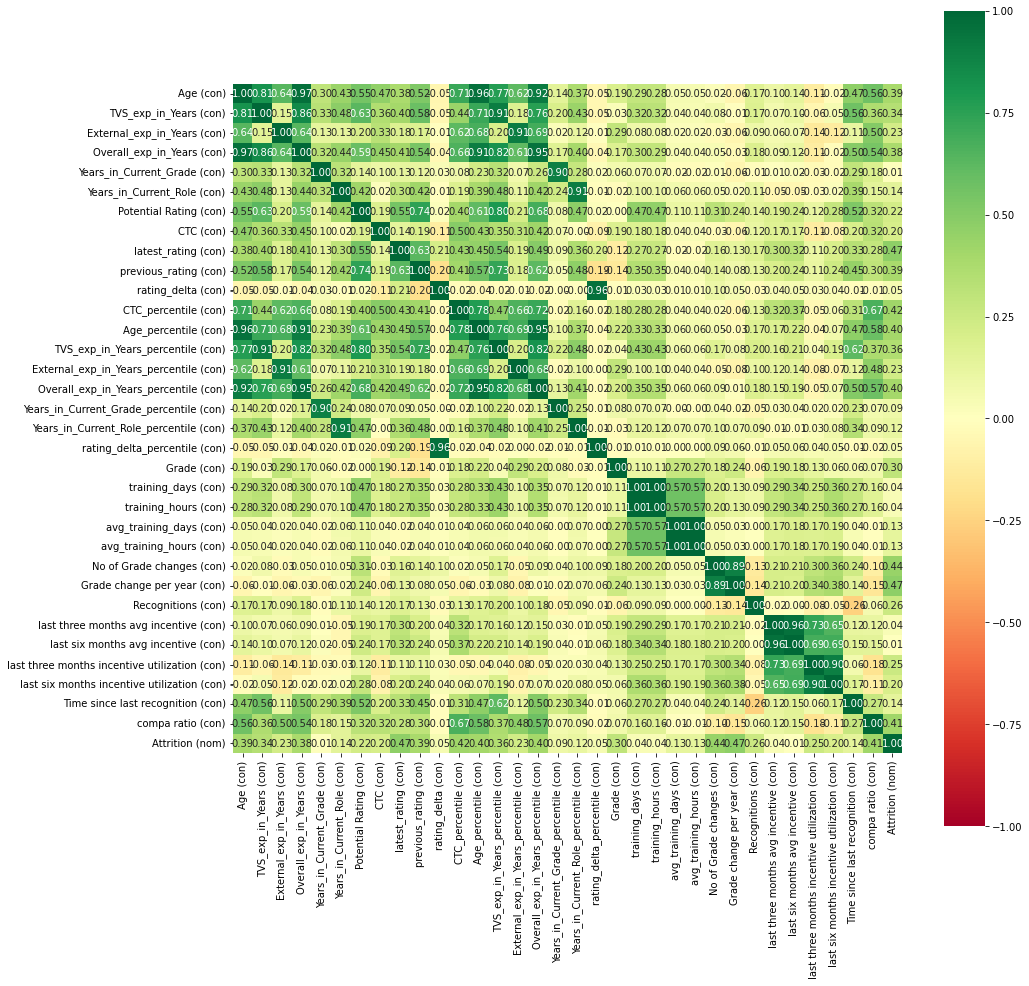

In [6]:
from dython import nominal
nominal.associations(df[num_target_features],figsize=(15,15),mark_columns=True,cmap="RdYlGn");


Performing chi square test on categorical features:                                                                                                                                                                                                                                                                                                                                                                                    
HO: Categorical variables are independent of each other.                                                                                                                                                        

HA: Catgeorical variables are correlated to each other

In [7]:
from scipy.stats import chi2_contingency

In [8]:
for i in cat_features:
    if chi2_contingency(pd.crosstab(df[i],df.Attrition))[1] >0.05:
        print(f"{i} vs Attrition: The P value is {chi2_contingency(pd.crosstab(df[i],df.Attrition))[1]}. We accept the null hypothesis.  The variables are independent of each other\n")
    else:    
        print(f"{i} vs Attrition: The P value is {chi2_contingency(pd.crosstab(df[i],df.Attrition))[1]}. We reject the null hypothesis. The variables are correlated to each other\n")

Gender vs Attrition: The P value is 0.32107325143499105. We accept the null hypothesis.  The variables are independent of each other

Department vs Attrition: The P value is 0.08930515190509816. We accept the null hypothesis.  The variables are independent of each other

work_location vs Attrition: The P value is 0.08189859801878087. We accept the null hypothesis.  The variables are independent of each other

trainings_attended vs Attrition: The P value is 0.054037178041997536. We accept the null hypothesis.  The variables are independent of each other

Designation vs Attrition: The P value is 3.539434054879656e-05. We reject the null hypothesis. The variables are correlated to each other

Role vs Attrition: The P value is 5.314137032553817e-24. We reject the null hypothesis. The variables are correlated to each other

Type of employment vs Attrition: The P value is 1.2869706902856663e-05. We reject the null hypothesis. The variables are correlated to each other

Mode of Selection vs A

In [9]:
df['last three months incentive utilization'].value_counts()

0.000000    153
0.039863      1
0.069553      1
0.206255      1
0.093982      1
           ... 
0.076206      1
0.024762      1
0.068276      1
0.045522      1
0.059954      1
Name: last three months incentive utilization, Length: 262, dtype: int64